In [122]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
from ode.commitee_ode import SquaredActivationODE, SymmetricInitialConditions, AlmostSymmetricInitialConditions, SquareODEResult
from simulation.commitee_learning import Simulation, SimulationResult
import numpy as np

d_list = [1000, 5000]
p = 8
k = 4
gamma0 = 1.
noise = 1e-3
dt = 1e-3
epsilon = 0.5
delta = 0.3
q0 = 4.

ic = AlmostSymmetricInitialConditions(p,k,epsilon,delta,q0)
ic_nodelta = SymmetricInitialConditions(p,k,epsilon,q0)

### Simulations

In [124]:
simrs = {}
for d, Wt, W0 in ic.simulations(d_list):
  print(f'Simulating d = {d}')
  sim = Simulation(d,p,k,noise,Wt,gamma0,'square',W0)
  simr = SimulationResult(f'test_epsilon-delta{epsilon}{delta}')
  simr.from_file_or_run(sim, path='computation-database/sim/',decades=2+np.log10(d), force_simulation=True)
  simrs[d] = simr

simrs_nodelta = {}
for d, Wt, W0 in ic_nodelta.simulations(d_list):
  print(f'Simulating d = {d}')
  sim = Simulation(d,p,k,noise,Wt,gamma0,'square',W0)
  simr = SimulationResult(f'test_epsilon-nodelta{epsilon}{delta}')
  simr.from_file_or_run(sim, path='computation-database/sim/',decades=2+np.log10(d), force_simulation=True)
  simrs_nodelta[d] = simr

Simulating d = 1000


100%|██████████| 90000/90000 [00:26<00:00, 3363.79it/s]


Simulating d = 5000


100%|██████████| 399999/399999 [02:52<00:00, 2316.29it/s]


Simulating d = 1000


100%|██████████| 90000/90000 [00:26<00:00, 3388.12it/s]


Simulating d = 5000


100%|██████████| 399999/399999 [02:46<00:00, 2399.08it/s]


### ODE

In [125]:
ode = SquaredActivationODE(p,k,noise,gamma0,ic.P,ic.Q,ic.M,dt)
oder = SquareODEResult(f'test_epsilon-delta{epsilon}{delta}', )
oder.from_file_or_run(ode, decades=2, path='computation-database/ode/', force_simulation=True)

ode_nodelta = SquaredActivationODE(p,k,noise,gamma0,ic_nodelta.P,ic_nodelta.Q,ic_nodelta.M,dt)
oder_nodelta = SquareODEResult(f'test_epsilon-nodelta{epsilon}{0.}', )
oder_nodelta.from_file_or_run(ode_nodelta, decades=2, path='computation-database/ode/', force_simulation=True)

100%|██████████| 90000/90000 [00:09<00:00, 9520.54it/s]


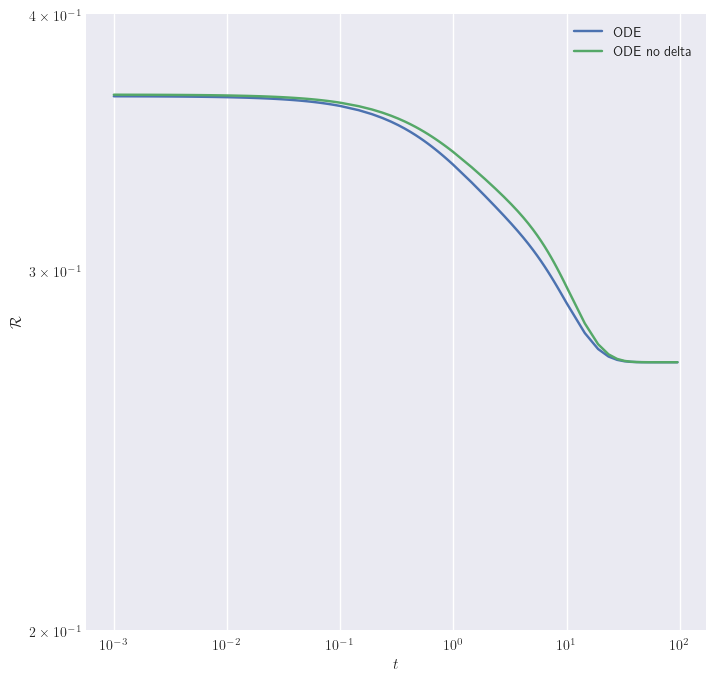

In [128]:
import matplotlib.pyplot as plt
from utilities import plot_style

with plot_style():
  fig, ax = plt.subplots(figsize=(8,8))
  ax.set_xscale('log')
  ax.set_yscale('log')
  ax.set_xlabel(r'$t$')
  ax.set_ylabel(r'$\mathcal{R}$')
  # ax.set_xlim(min(ode.saved_times), max(ode.saved_times))
  # ax.set_xlim(1e-3,70)
  ax.set_ylim(0.2,0.4)


  # Plot ODE
  ax.plot(oder.times, oder.risks, label='ODE')
  ax.plot(oder_nodelta.times, oder_nodelta.risks, label='ODE no delta')

  # Plot simulations
  # for d, s in simrs.items():
  #   t = np.array(s.steps) / d
  #   ax.plot(t, s.risks, label=f'$d={s.d}$',ls='--',lw=1.,marker='o',ms=5.)
  
  # for d, s in simrs_nodelta.items():
  #   t = np.array(s.steps) / d
  #   ax.plot(t, s.risks, label=f'$d={s.d}$',ls='--',lw=1.,marker='o',ms=5.)

  ax.legend()
  plt.show()
  

In [127]:
print(ic_nodelta.M)
print(ic.M)

[[0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125]]
[[0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05]
 [0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2 ]
 [0.2  0.2  0.2  0.2 ]]
